In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import pandas as pd


def plot_by_shots(avg_csv_path:str, std_csv_path:str, limits:tuple, figsize:tuple=(14, 5)) -> None:
    avg_df = pd.read_csv(avg_csv_path)
    std_df = pd.read_csv(std_csv_path)
    methods = avg_df.iloc[:, 0].tolist()
    shots = list(avg_df.columns)[1:]

    color_category = {
        "Baseline": "blue", "CSR": "blue", "ER": "blue",
        "Dropout": "orange", "DropMessage": "orange", "DropNode": "orange", "DropEdge": "orange", "DropAttributes": "orange",
        "Augmentation": "brown", "Rewiring": "brown",
        "ProtoNet": "red",
        "Siamese_PW": "green", "Siamese_PW_A": "green", "Siamese_TPL": "green", "Siamese_TPL_A": "green",
        "GraphCL": "purple"
    }
    alpha_map = {
        "Baseline": 0.9, "CSR": 0.7, "ER": 0.5,
        "Dropout": 1.0, "DropMessage": 0.8, "DropNode": 0.6, "DropEdge": 0.4, "DropAttributes": 0.2,
        "Augmentation": 0.8, "Rewiring": 0.4,
        "ProtoNet": 1.0,
        "Siamese_PW": 0.9, "Siamese_PW_A": 0.7, "Siamese_TPL": 0.5, "Siamese_TPL_A": 0.3,
        "GraphCL": 1.0
    }

    plt.figure(figsize=figsize)
    for i, method in enumerate(methods):
        means = avg_df.iloc[i, 1:].values
        stds = std_df.iloc[i, 1:].values
        base_color = color_category.get(method, "gray")
        alpha = alpha_map.get(method, 0.7)
        rgba_color = mcolors.to_rgba(base_color, alpha=alpha)
        num_methods = len(methods)
        bar_width = 0.8 / num_methods
        offset = (i - (num_methods - 1) / 2) * bar_width
        plt.bar(np.arange(len(means)) + offset, means, bar_width, yerr=stds, capsize=3, color=rgba_color, label=method)
    
    plt.xlabel("Number of Samples per Class")
    plt.ylabel("Accuracy")
    plt.title("Accuracy by Number of Samples per Class")
    plt.xticks(np.arange(len(shots)), shots)
    plt.ylim(limits[0], limits[1])
    plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left")
    plt.tight_layout()
    plt.show()


def plot_by_method(avg_csv_path:str, std_csv_path:str, limits:tuple, figsize:tuple=(14, 5)) -> None:
    avg_df = pd.read_csv(avg_csv_path)
    std_df = pd.read_csv(std_csv_path)
    methods = avg_df.iloc[:, 0].tolist()
    shots = list(avg_df.columns)[1:]

    plt.figure(figsize=figsize)
    for j in range(len(shots)):
        means = avg_df.iloc[:, j + 1].values
        stds = std_df.iloc[:, j + 1].values
        num_methods = len(methods)
        bar_width = 0.8 / len(shots)
        offset = (j - (len(shots) - 1) / 2) * bar_width
        plt.bar(np.arange(num_methods) + offset, means, bar_width, yerr=stds, capsize=3, label=f'{shots[j]} samples')
    plt.xlabel("Method")
    plt.ylabel("Accuracy")
    plt.title("Accuracy by Method")
    plt.xticks(np.arange(num_methods), methods, rotation=45, ha='right')
    plt.ylim(limits[0], limits[1])
    plt.legend(title="Samples per Class", bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()


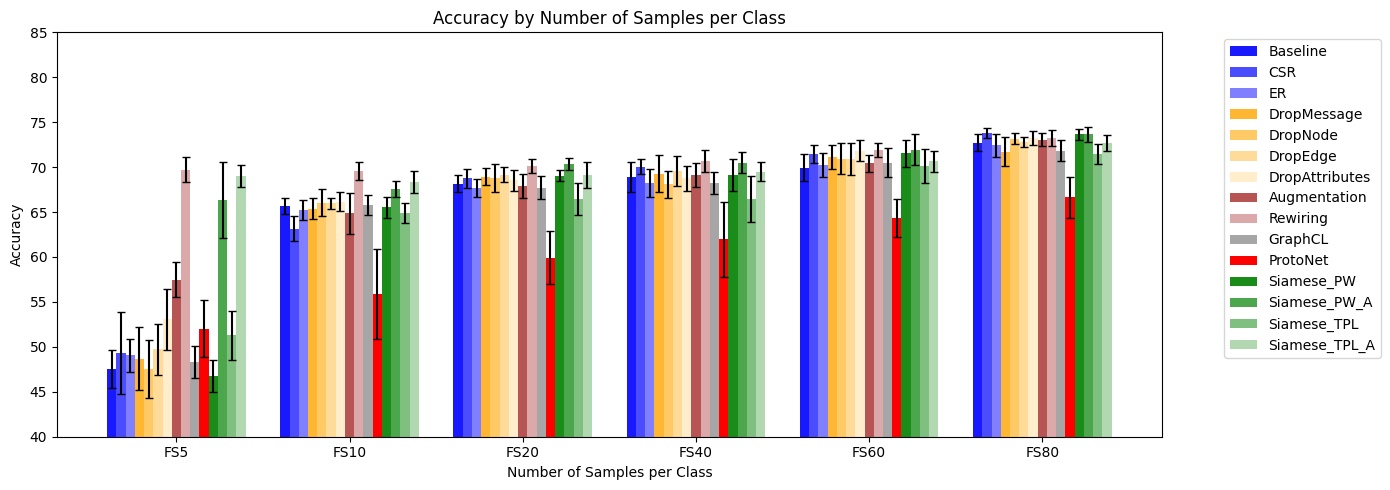

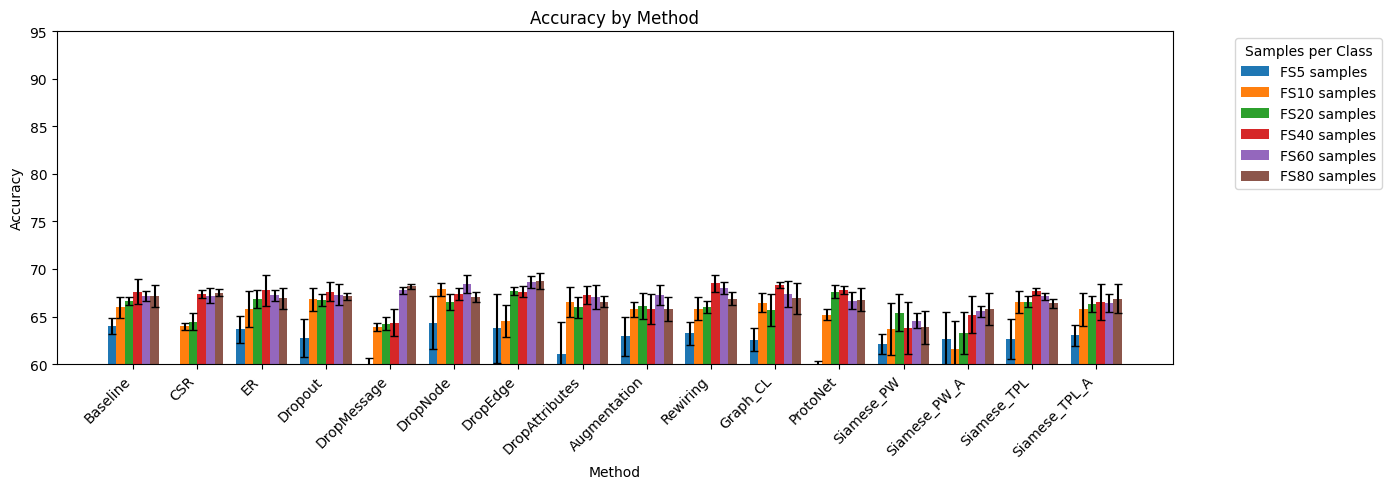

In [20]:
plot_by_shots(
    avg_csv_path='/home/nicolamaestri/nm_gnn/scripts/node_classification/results/CiteSeer/avg_f1.csv',
    std_csv_path='/home/nicolamaestri/nm_gnn/scripts/node_classification/results/CiteSeer/std_f1.csv',
    limits=(40, 85),
    figsize=(14, 5)
)

plot_by_method(
    avg_csv_path='/home/nicolamaestri/nm_gnn/scripts/graph_classification/results/PROTEINS/avg_f1.csv',
    std_csv_path='/home/nicolamaestri/nm_gnn/scripts/graph_classification/results/PROTEINS/std_f1.csv',
    limits=(60, 95),
    figsize=(14, 5)
)